In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Create some data
n = 9001
sim_ids = np.arange(n)
sim_df = pd.DataFrame(data=sim_ids, columns=['user_ids'])
sim_df.head()
# For consistency
seed = 72
np.random.seed(seed)


In [10]:

# Generate random variables
random_feature1 = np.random.normal(0, 5, sim_ids.size)
random_feature2 = np.random.normal(4, 2, sim_ids.size)
sim_df['feature1'] = pd.Series(random_feature1, index=sim_df.index)
sim_df['feature2'] = pd.Series(random_feature2, index=sim_df.index)

sim_df.head()


,user_ids,feature1,feature2
0,0,1.592727,0.500382
1,1,-3.397797,4.927748
2,2,-11.041942,3.330705
3,3,2.951201,5.835964
4,4,8.373830,4.580326


In [11]:

# Get a sample
n_samples = 200
samples_df = sim_df.sample(n_samples, random_state=seed)
samples_df.describe()


,user_ids,feature1,feature2
count,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946
std,2368.773293,5.190724,2.051522
min,142.000000,-12.737091,-1.783443
25%,2374.000000,-3.186165,2.868998
50%,3852.500000,0.325406,4.228844
75%,6036.500000,3.278900,5.483611
max,8929.000000,13.291145,8.380286


In [12]:

# Assign groups (randomly)
is_treatment = np.random.choice([0, 1], size=n_samples)
samples_df = samples_df.assign(is_treatment=is_treatment)
samples_df.describe()


,user_ids,feature1,feature2,is_treatment
count,200.000000,200.000000,200.000000,200.000000
mean,4188.605000,0.058750,4.146946,0.485000
std,2368.773293,5.190724,2.051522,0.501029
min,142.000000,-12.737091,-1.783443,0.000000
25%,2374.000000,-3.186165,2.868998,0.000000
50%,3852.500000,0.325406,4.228844,0.000000
75%,6036.500000,3.278900,5.483611,1.000000
max,8929.000000,13.291145,8.380286,1.000000


<Axes: xlabel='feature1', ylabel='Density'>

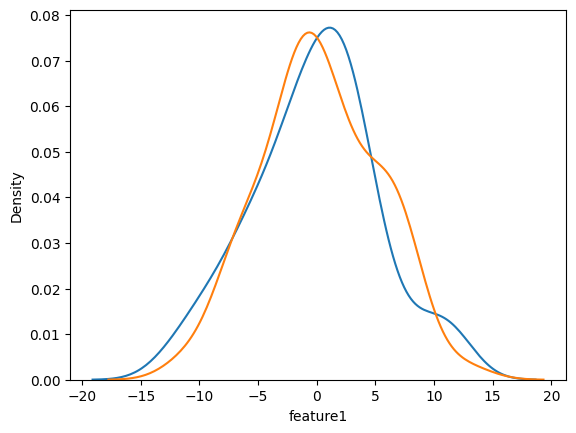

In [13]:

# Check if the groups in the sample are similar in regards to the random variables
# Plot visually
sns.kdeplot(samples_df[samples_df.is_treatment == 0].feature1)
sns.kdeplot(samples_df[samples_df.is_treatment == 1].feature1)


<Axes: xlabel='feature2', ylabel='Density'>

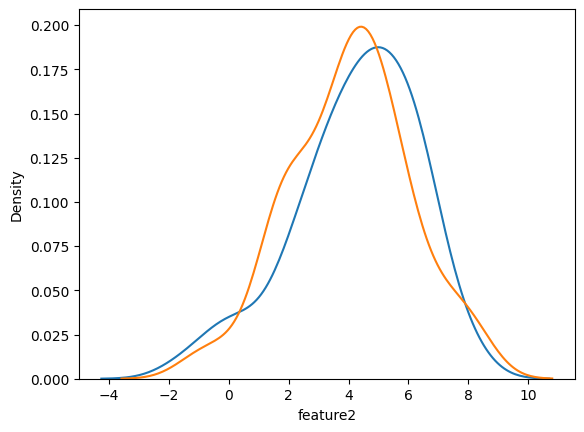

In [14]:

sns.kdeplot(samples_df[samples_df.is_treatment == 0].feature2)
sns.kdeplot(samples_df[samples_df.is_treatment == 1].feature2)


<Axes: xlabel='feature1', ylabel='Density'>

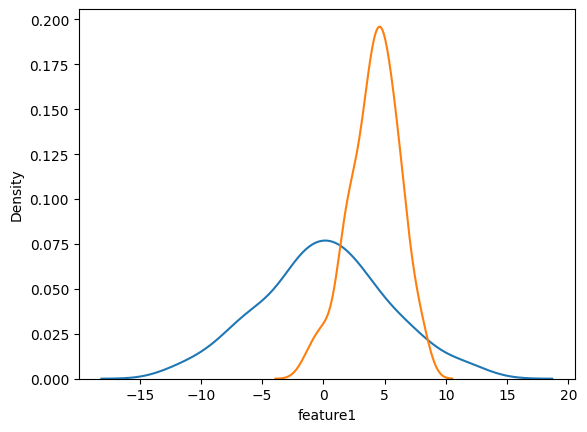

In [15]:
sns.kdeplot(samples_df.feature1)
sns.kdeplot(samples_df.feature2)


In [16]:

# Hypothesis test
from scipy import stats
def is_significant(group1, group2, alpha=0.05):    
 
    t, p = stats.ttest_ind(group1, group2, equal_var=False)
    return p < alpha, p


In [17]:
def experiment_vs_control(df, var_name, alpha=0.05):
    #
    treatment_group = df[df.is_treatment == 0][var_name]
    control_group = df[df.is_treatment == 1][var_name]
    # 
    return is_significant(treatment_group, control_group, alpha)



In [18]:
experiment_vs_control(samples_df, 'feature2')


(False, 0.42978681439524635)

In [19]:
is_significant(samples_df.feature1, samples_df.feature2)


(True, 2.84912539013435e-21)